# AirBnB Occupancy before and after Covid-19

How is Airbnb really being used in and affecting the neighbourhoods of your city?

Airbnb claims to be part of the "sharing economy" and disrupting the hotel industry. However, data shows that the majority of Airbnb listings in most cities are entire homes, many of which are rented all year round - disrupting housing and communities.

In [1]:
reviews = context.catalog.load('abnb_reviews')
neighbourhoods = context.catalog.load('abnb_neighbourhoods')
listings = context.catalog.load('abnb_listings')

2020-04-25 19:10:03,975 - kedro.io.data_catalog - INFO - Loading data from `abnb_reviews` (CSVDataSet)...
2020-04-25 19:10:04,090 - kedro.io.data_catalog - INFO - Loading data from `abnb_neighbourhoods` (CSVDataSet)...
2020-04-25 19:10:04,101 - kedro.io.data_catalog - INFO - Loading data from `abnb_listings` (CSVDataSet)...


In [2]:
listings.count()

id                                9136
name                              9124
host_id                           9136
host_name                         9136
neighbourhood_group                  0
neighbourhood                     9136
latitude                          9136
longitude                         9136
room_type                         9136
price                             9136
minimum_nights                    9136
number_of_reviews                 9136
last_review                       7677
reviews_per_month                 7677
calculated_host_listings_count    9136
availability_365                  9136
dtype: int64

## Room Type

Airbnb hosts can list entire homes/apartments, private or shared rooms.

Depending on the room type, availability, and activity, an airbnb listing could be more like a hotel, disruptive for neighbours, taking away housing, and illegal.

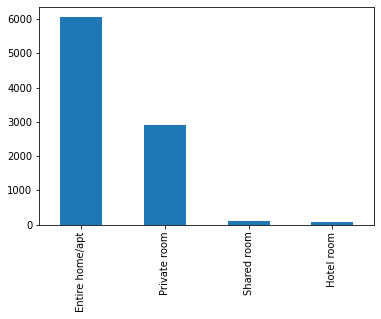

In [3]:
# Get an idea on the distribution of room types.
listings.room_type.value_counts().plot.bar()

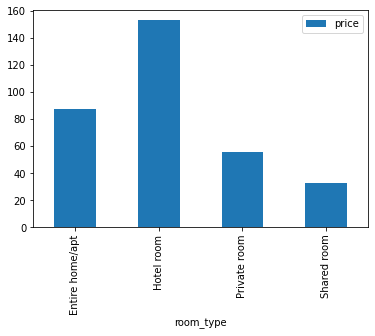

In [4]:
# Get an idea on the avg price for each room type.
listings.groupby('room_type').mean().plot.bar(y='price')

_Hotel rooms are understandably the highest priced. Of note is the differenceBetween a shared room and a provae room is not too drastic._

## Activity
Airbnb guests may leave a review after their stay, and these can be used as an indicator of airbnb activity.

The minimum stay, price and number of reviews have been used to estimate the **occupancy rate**, the **number of nights per year** and the **income per month** for each listing.

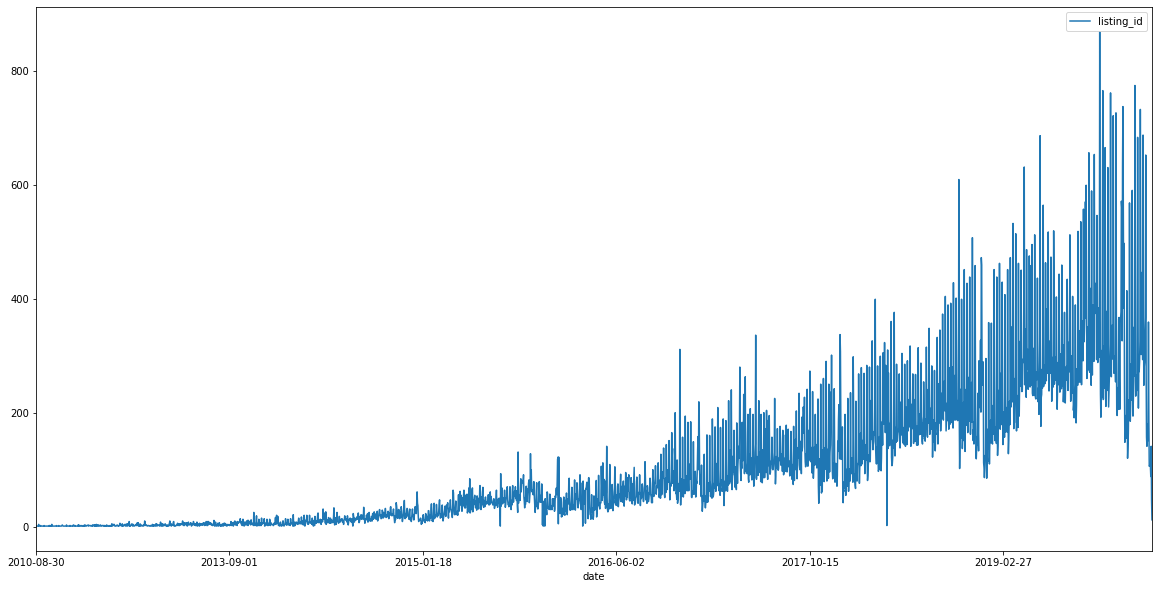

In [30]:
# Visualize the amount of reviews by date
reviews.groupby('date').count().plot(figsize=(20,10))

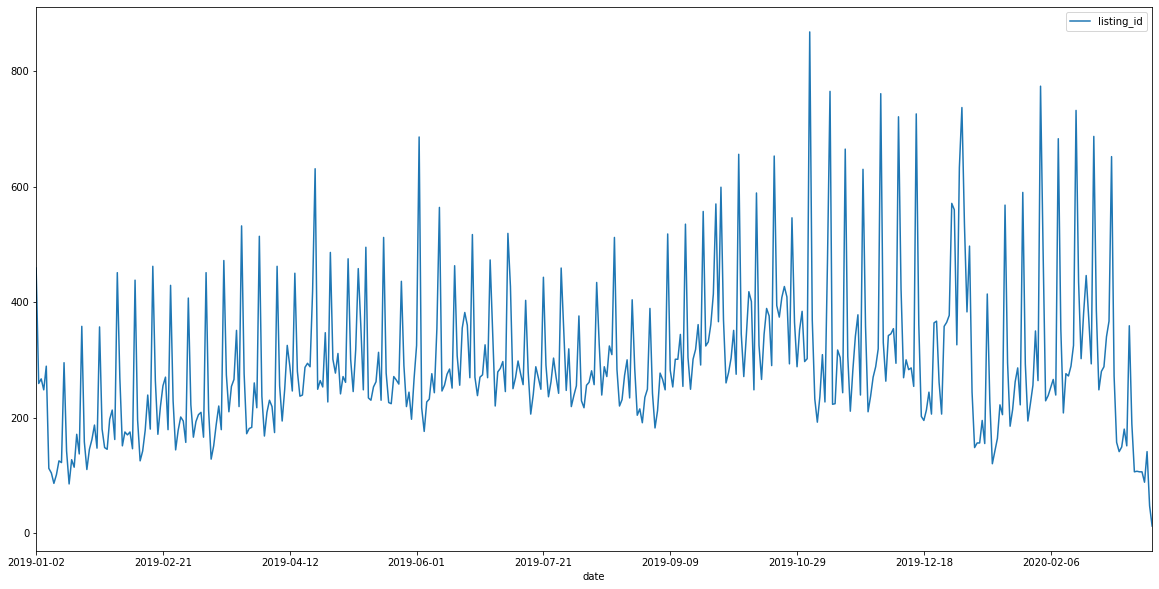

In [29]:
# We want to look at the last couple of years
recent_reviews = reviews[(reviews['date'] > '2019-01-01') & (reviews['date'] < '2020-04-01')]
recent_reviews.groupby('date').count().plot(figsize=(20,10))

_You can definitely see a steep decrease towards the end there!._

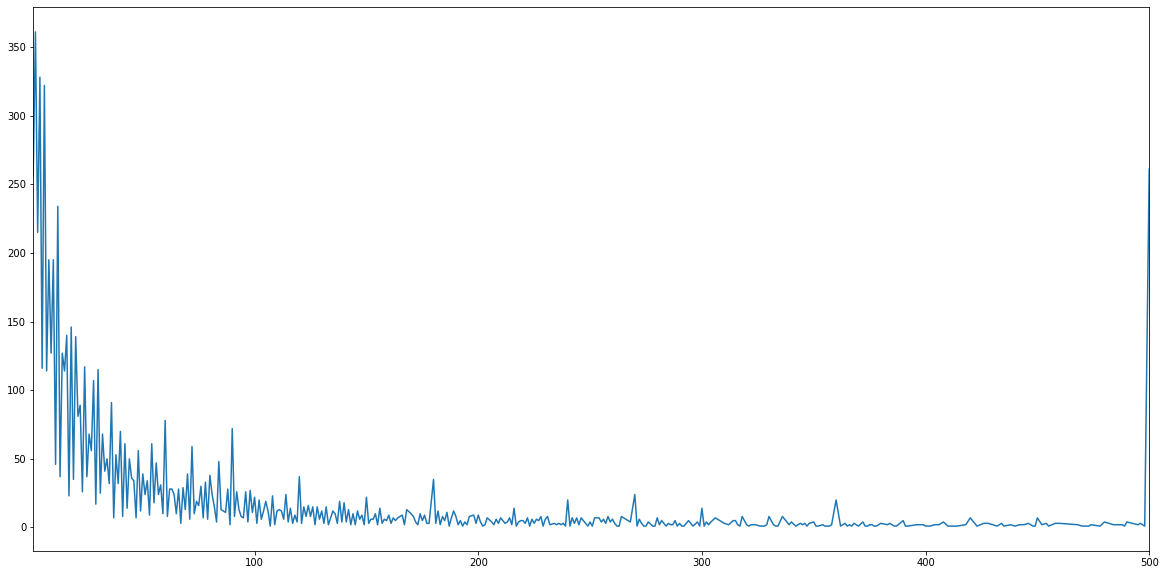

In [28]:
# Estimated nights
listings['estimated_nights'] = listings.apply(lambda row: min(row.minimum_nights * row.number_of_reviews, 500), axis=1)
listings.estimated_nights.value_counts().sort_index().drop(0).plot.line(x='estimated_nights', y='count', figsize=(20,10))

We can see there's a lot of variance on the estimated nights a listing on Brussels have. I'm interested in taking a look at those above the mean

In [8]:
listings['estimated_nights'].mean()
listings_high_occupancy = listings[listings['estimated_nights'] > 5000]
listings_high_occupancy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,estimated_nights
54,348575,Duplex first floor - Brussels,1764707,Marcelo,NaN,Bruxelles,50.84915,4.36475,Entire home/apt,90,90,196,2020-03-01,2.06,3,213,17640
92,686148,"Arty House ""Barbara"" Brussels Centre",2570123,Jean-Lucien,NaN,Bruxelles,50.84543,4.34545,Entire home/apt,31,91,69,2020-02-11,0.76,3,148,6279
193,1184497,Grand Place Central Station Waouw!,6478789,Laurent,NaN,Bruxelles,50.84534,4.35837,Entire home/apt,67,180,50,2019-08-03,0.62,1,260,9000
217,1316203,Bright & New apt in E.U. district,876633,Nicolas,NaN,Etterbeek,50.83899,4.38186,Entire home/apt,65,95,54,2020-02-01,0.69,11,62,5130
244,1591834,Flagey bright charming 2 bedroom apt with a view!,7975542,Monica,NaN,Ixelles,50.82845,4.37074,Entire home/apt,105,91,143,2020-02-23,1.80,1,346,13013
292,1982347,Flat Grand Place - medium and long term,10229012,Wim,NaN,Bruxelles,50.84779,4.35664,Entire home/apt,70,90,196,2020-02-24,2.57,1,100,17640
325,2281629,Luxury Louise - Stéphanie home,3934484,Jan,NaN,Saint-Gilles,50.82826,4.35288,Entire home/apt,71,60,86,2019-12-07,1.17,1,339,5160
422,3328658,Between Royal Palace and Sablon,3801393,Lionel,NaN,Bruxelles,50.84000,4.36057,Entire home/apt,62,90,166,2017-09-22,2.44,1,228,14940
461,3509343,Luminous flat centre/St.Catherine,17669040,Bryan,NaN,Bruxelles,50.85165,4.34988,Entire home/apt,70,92,313,2020-01-03,4.53,1,321,28796
548,4109019,!AMAZING! view in luxury new tower,876633,Nicolas,NaN,Bruxelles,50.86397,4.35282,Entire home/apt,120,91,94,2020-01-22,1.41,11,240,8554


I see Alice is definitely running a successful business! (3 aptms with over 5000 reviews each)

## Availability
An Airbnb host can setup a calendar for their listing so that it is only available for a few days or weeks a year.

Other listings are available all year round (except for when it is already booked).

Entire homes or apartments highly available year-round for tourists, probably don't have the owner present, could be illegal, and more importantly, are displacing residents.

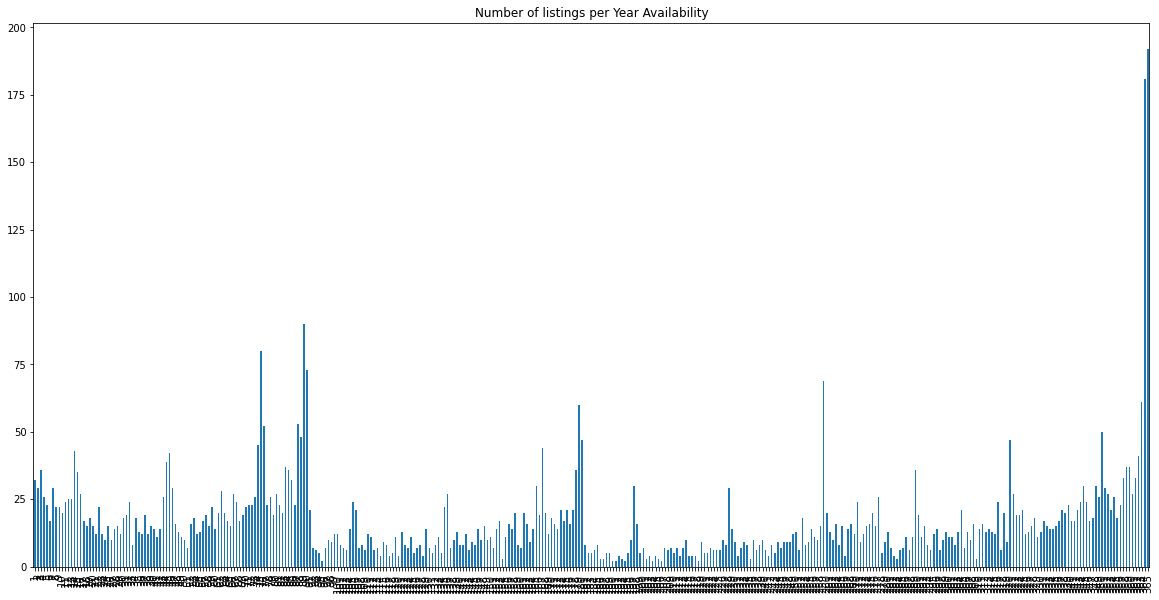

In [47]:
# Let's try and chart availability per listings.

listings.availability_365.value_counts().sort_index().drop(0).plot\
.bar(xticks=(50, 100, 150, 200, 250, 300, 350), figsize=(20,10), title='Number of listings per Year Availability')

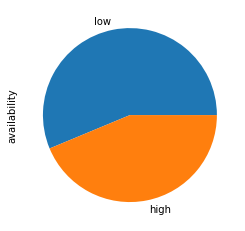

In [52]:
# Now, let's do a pie chart to check the relationship between low and hight availability

listings['availability'] = listings.apply(lambda row: 'high' if int(row.availability_365) > 90 else 'low', axis=1)
listings.availability.value_counts().plot.pie(y='availability')

## Listings per Host
Some Airbnb hosts have multiple listings.

A host may list separate rooms in the same apartment, or multiple apartments or homes available in their entirity.

Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property, and in violation of most short term rental laws designed to protect residential

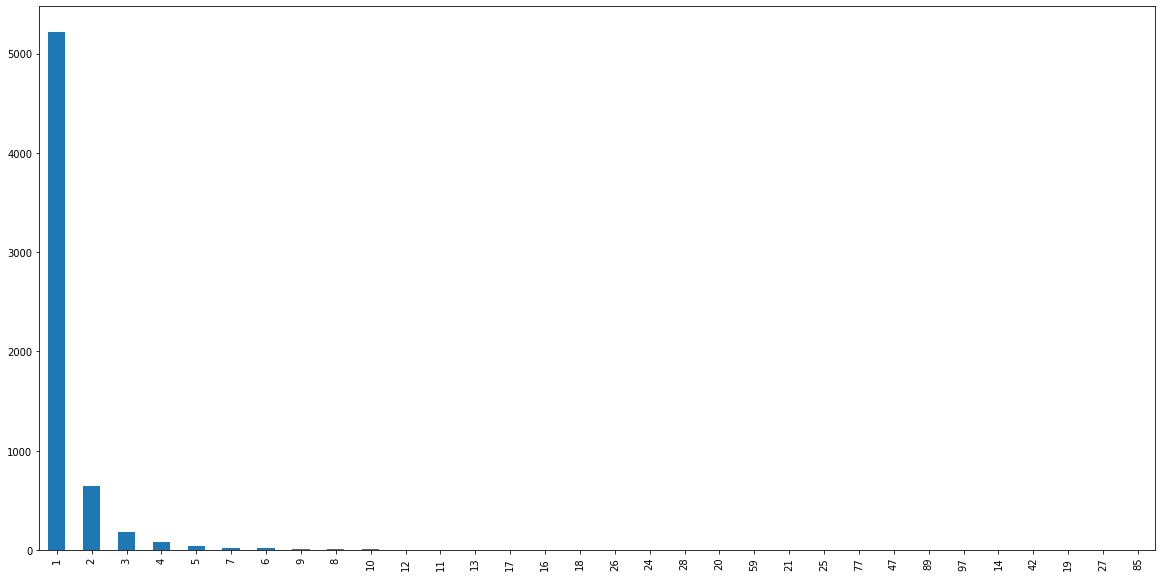

In [68]:
# Let's group by host_id to get the count of listings
listings.groupby('host_id').count().id.value_counts().plot.bar(figsize=(20,10))

In [80]:
# Let's see in detail the hosts with more than 10 listings.
listings_count = listings.groupby('host_id').count()
greedy_hosts = listings_count[listings_count['id'] > 10]
greedy_hosts.sort_values(by=['id'], ascending=False)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,estimated_nights,availability
host_id,,,,,,,,,,,,,,,,,
19427428,97,97,97,0,97,97,97,97,97,97,97,80,80,97,97,97,97
19293722,89,89,89,0,89,89,89,89,89,89,89,87,87,89,89,89,89
23082521,85,85,85,0,85,85,85,85,85,85,85,64,64,85,85,85,85
2792958,77,77,77,0,77,77,77,77,77,77,77,72,72,77,77,77,77
5056483,59,59,59,0,59,59,59,59,59,59,59,55,55,59,59,59,59
871030,47,47,47,0,47,47,47,47,47,47,47,47,47,47,47,47,47
24444714,42,42,42,0,42,42,42,42,42,42,42,39,39,42,42,42,42
239768848,28,28,28,0,28,28,28,28,28,28,28,28,28,28,28,28,28
189315430,27,27,27,0,27,27,27,27,27,27,27,23,23,27,27,27,27


### Definitely , there's some hotel or business operating on Brussels